In [4]:
import gym

In [39]:
env = gym.make('CarRacing-v0')
obs = env.reset()
env.close()

Track generation: 1212..1519 -> 307-tiles track


In [40]:
import numpy as np
import matplotlib.pyplot as plt

(96, 96, 3)


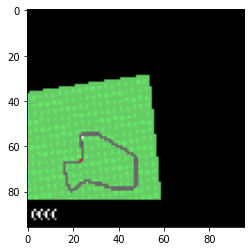

In [41]:
obs = np.array(obs)
print(obs.shape)
plt.imshow(obs)

(96, 96)


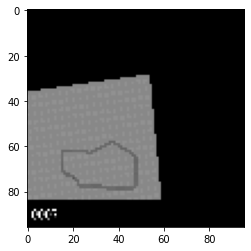

In [21]:
obs_gray = np.mean(obs, axis=2)
print(obs_gray.shape)
plt.imshow(obs_gray, cmap='gray')

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [46]:
obs_tensor = torch.tensor(obs, dtype=torch.float32)
print(obs_tensor.shape)
obs_tensor = obs_tensor.unsqueeze(0)
print(obs_tensor.shape)
obs_tensor = obs_tensor.permute(0,3,1,2)
print(obs_tensor.shape)

torch.Size([96, 96, 3])
torch.Size([1, 96, 96, 3])
torch.Size([1, 3, 96, 96])


In [60]:

x = obs_tensor.detach().clone()
print("Input", x.shape)
conv1 = nn.Conv2d(3, 16, kernel_size=5, stride=2)
x = conv1(x)
print("Conv1", x.shape)
conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=2)
x = conv2(x)
print("Conv2", x.shape)
linear_size = x.shape[1] * x.shape[2] * x.shape[3]
x = x.view(x.size(0),-1)
print("Flatten", x.shape)
linear = nn.Linear(linear_size, 3)
x = linear(x)
print("Linear", x.shape)

Input torch.Size([1, 3, 96, 96])
Conv1 torch.Size([1, 16, 46, 46])
Conv2 torch.Size([1, 32, 21, 21])
Flatten torch.Size([1, 14112])
Linear torch.Size([1, 3])


In [70]:
class DQN(nn.Module):
    def __init__(self):
        super(DQN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=2)
        self.linear = nn.Linear(14112, 3)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(x.size(0), -1)
        return self.linear(x)

In [71]:
dqn = DQN()
x = obs_tensor.detach().clone()
dqn(x)

tensor([[6.7973, 2.8552, 8.3987]], grad_fn=<AddmmBackward>)

In [75]:
# convert a single obs from gym into a tensor for DQN
def to_tensor(obs):
    obs = np.array(obs)
    obs_tensor = torch.tensor(obs, dtype=torch.float32)
    obs_tensor = obs_tensor.unsqueeze(0)
    obs_tensor = obs_tensor.permute(0,3,1,2)
    return obs_tensor

In [76]:
obs = env.reset()
env.close()
obs_tensor = to_tensor(obs)
print(obs_tensor.shape)

Track generation: 1045..1310 -> 265-tiles track
torch.Size([1, 3, 96, 96])
